In [7]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [4]:
# Cargar los datos preprocesados
df = pd.read_csv("../data/datos_preprocesados.csv")

# Separar variable objetivo y predictoras
X = df.drop(columns=["vive"])
y = df["vive"]

In [5]:
# 1. Separar en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Construir modelo
modelo = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # salida binaria
])

# 3. Compilar
modelo.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# 4. Entrenar
historial = modelo.fit(X_train, y_train, epochs=20, batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4097 - accuracy: 0.8720 - val_loss: 0.3686 - val_accuracy: 0.8672
Epoch 2/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3557 - accuracy: 0.8725 - val_loss: 0.3520 - val_accuracy: 0.8674
Epoch 3/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3436 - accuracy: 0.8731 - val_loss: 0.3463 - val_accuracy: 0.8672
Epoch 4/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3390 - accuracy: 0.8734 - val_loss: 0.3429 - val_accuracy: 0.8676
Epoch 5/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3378 - accuracy: 0.8733 - val_loss: 0.3418 - val_accuracy: 0.8672
Epoch 6/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3367 - accuracy: 0.8729 - val_loss: 0.3437 - val_accuracy: 0.8672
Epoch 7/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3354 - accuracy: 0.8737 - val_loss: 0.3408 - val_accuracy:

Epoch 1/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9797 - accuracy: 0.6604 - val_loss: 0.6834 - val_accuracy: 0.7440
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6480 - accuracy: 0.7458 - val_loss: 0.6511 - val_accuracy: 0.7579
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6200 - accuracy: 0.7511 - val_loss: 0.5552 - val_accuracy: 0.7644
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6155 - accuracy: 0.7531 - val_loss: 0.5902 - val_accuracy: 0.7640
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6171 - accuracy: 0.7532 - val_loss: 0.6531 - val_accuracy: 0.7500
Epoch 6/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6134 - accuracy: 0.7536 - val_loss: 0.6088 - val_accuracy: 0.7615
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6116 - accuracy: 0.7546 - val_loss: 0.5947 - val_accuracy:

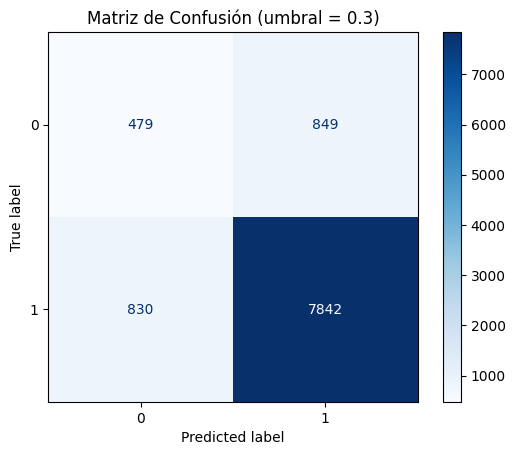

In [10]:
from sklearn.utils import class_weight


# 2. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Calcular pesos de clase
pesos = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(pesos))

# 4. Definir modelo con más regularización y dropout
modelo = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 5. Compilar
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Entrenar con pesos de clase
modelo.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2,
           class_weight=class_weights, verbose=1)

# 7. Predecir y aplicar umbral ajustado
y_pred_prob = modelo.predict(X_test)
y_pred = (y_pred_prob > 0.3).astype(int)  # Umbral ajustado

# 8. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión (umbral = 0.3)")
plt.show()